In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
%matplotlib inline

In [40]:
CH_data = pd.read_fwf("C:/Users/willi/Desktop/Savin Group/rate_CH.txt", widths = [13, 13, 13, 13])

CH2_data = pd.read_fwf("C:/Users/willi/Desktop/Savin Group/rate_CH2.txt", widths = [13, 13, 13, 13])
# 'voltage' 'energy' 'rate' 'uncertainty

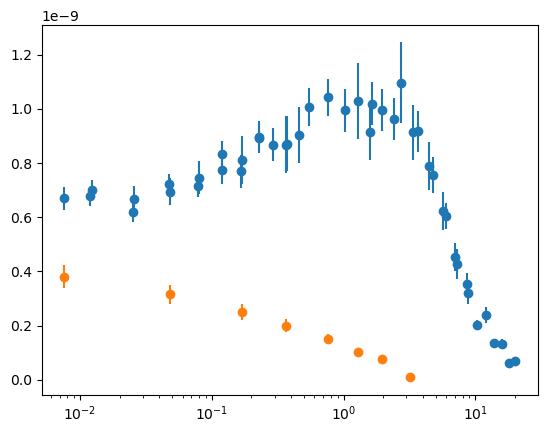

In [41]:
plt.errorbar(CH_data['energy'], CH_data['rate'], yerr = CH_data['uncertainty'], fmt="o")
plt.errorbar(CH2_data['energy'], CH2_data['rate'], yerr = CH2_data['uncertainty'], fmt="o")
plt.xscale("log")

In [42]:
def cross_sectionCH(E, a_0, a_12, b_2, b_4):
    f = 907499.99918301
    b_1= 0 
    upper = a_0 + (a_12*np.sqrt(E))
    lower = (E**(2/3)) + (b_1*(E)) + (b_2*(E**2)) + (b_4*(E**4))
    cs = (upper/lower) * (np.sqrt(E)) * f
    return cs

In [43]:
def cross_sectionCH2(E, a_0, b_1, b_2, b_4):
    f = 907499.99918301
    upper = a_0
    lower = (E**(2/3)) + (b_1*(E)) + (b_2*(E**2)) + (b_4*(E**4))
    cs = (upper/lower) * (np.sqrt(E)) * f
    return cs

In [44]:
def cross_sectionCH_f(E, f):
    [a_0, a_12, b_2, b_4] = [2.34571709e-16, 1.07436268e-15, 1.45420101e-01, 2.03119359e-03]
    b_1= 0 
    upper = a_0 + (a_12*np.sqrt(E))
    lower = (E**(2/3)) + (b_1*(E)) + (b_2*(E**2)) + (b_4*(E**4))
    cs = (upper/lower) * (np.sqrt(E)) * f
    return cs

In [45]:
guessf = [9e5]
poptf, pcovf= optimize.curve_fit(cross_sectionCH_f, CH_data['energy'], CH_data['rate'], sigma = CH_data['uncertainty'], p0 = guessf, method="lm")
perrf = np.sqrt(np.diag(pcovf))
poptf

array([907499.99918301])

In [46]:
guessCH = [2.3474E-16, 1.1028E-15, 1.4694E-01, 2.0471E-03]
poptCH, pcovCH = optimize.curve_fit(cross_sectionCH, CH_data['energy'], CH_data['rate'], sigma = CH_data['uncertainty'], p0 = guessCH, method="lm")
perrCH = np.sqrt(np.diag(pcovCH))
poptCH

array([2.34571711e-16, 1.07436267e-15, 1.45420097e-01, 2.03119359e-03])

In [47]:
energiesCH = np.logspace(np.log10(min(CH_data['energy'])), np.log10(max(CH_data['energy'])), 1000)
#fitCH = [cross_sectionCH(energyCH, 2.3474E-16, 1.1028E-15, 1.4694E-01, 2.0471E-03) for energyCH in energiesCH]
#fitCH = [cross_sectionCH(energyCH, poptCH[0], poptCH[1], poptCH[2], poptCH[3], poptCH[4]) for energyCH in energiesCH]
fitCH = [cross_sectionCH(energyCH, poptCH[0], poptCH[1], poptCH[2], poptCH[3]) for energyCH in energiesCH]


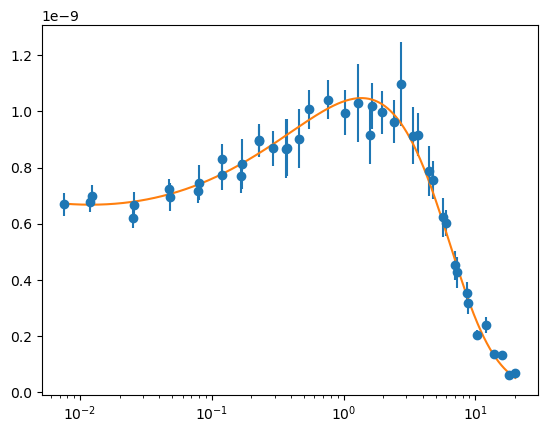

In [48]:
plt.errorbar(CH_data['energy'], CH_data['rate'], yerr = CH_data['uncertainty'], fmt="o")
plt.plot(energiesCH, fitCH)
plt.xscale("log")

In [49]:
perrCH

array([1.18573071e-17, 4.66015988e-17, 1.70299991e-02, 1.42554015e-04])

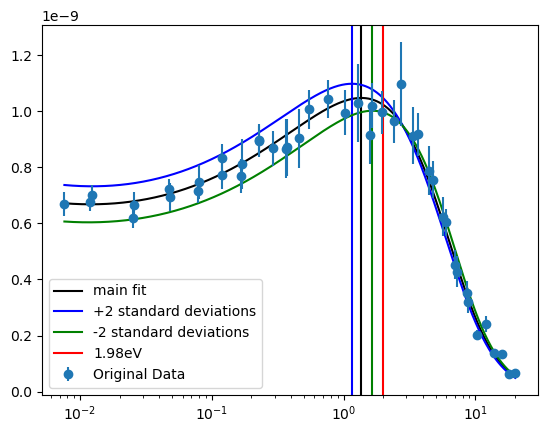

In [50]:
fitCH1 = [cross_sectionCH(energyCH, poptCH[0]+2*1.18573071e-17, poptCH[1]+2*4.66015988e-17, poptCH[2]+2*1.70299991e-02, poptCH[3]+2*1.42554015e-04) for energyCH in energiesCH]
fitCH2 = [cross_sectionCH(energyCH, poptCH[0]-2*1.18573071e-17, poptCH[1]-2*4.66015988e-17, poptCH[2]-2*1.70299991e-02, poptCH[3]-2*1.42554015e-04) for energyCH in energiesCH]
plt.plot(energiesCH, fitCH, c="black", label = "main fit")
plt.axvline(x = 1.36516395060495, color = 'black')
plt.plot(energiesCH, fitCH1, c= "blue", label = "+2 standard deviations")
plt.axvline(x = 1.1568595416560963, color = 'blue')
plt.plot(energiesCH, fitCH2, c= "green", label = "-2 standard deviations")
plt.axvline(x = 1.6495330275039606, color = 'green')
plt.axvline(x=1.98, color="red", label = "1.98eV")
plt.errorbar(CH_data['energy'], CH_data['rate'], yerr = CH_data['uncertainty'], fmt="o", label = "Original Data")
plt.xscale("log")
plt.legend()

In [51]:
max_y = max(fitCH1)  # Find the maximum y value
max_x = energiesCH[fitCH1 .index(max_y)]  # Find the x value corresponding to the maximum y value
print (max_x, max_y)

1.1568595416560963 1.0976799288477657e-09


In [52]:
max_y = max(fitCH2)  # Find the maximum y value
max_x = energiesCH[fitCH2.index(max_y)]  # Find the x value corresponding to the maximum y value
print (max_x, max_y)

1.6495330275039606 1.001463844958473e-09


In [53]:
max_y = max(fitCH)  # Find the maximum y value
max_x = energiesCH[fitCH.index(max_y)]  # Find the x value corresponding to the maximum y value
print (max_x, max_y)

1.36516395060495 1.047092074208011e-09


In [54]:
def cross_sectionCH_min(params):
    f = 907499.99918301
    b_1 = 0 
    E, a_0, a_12, b_2, b_4 = params
    upper = a_0 + (a_12*np.sqrt(E))
    lower = (E**(2/3)) + (b_1*(E)) + (b_2*(E**2)) + (b_4*(E**4))
    cs = 1 -1*(upper/lower) * (np.sqrt(E)) * f
    return cs

In [55]:
optimize.minimize(cross_sectionCH_min,
                 x0 = [1.36516395060495, 2.34571711e-16, 1.07436267e-15, 1.45420097e-01, 2.03119359e-03],
                 bounds = [(0,2),
                           (2.34571711e-16 - (2*1.18573071e-17), 2.34571711e-16 + (2*1.18573071e-17)),
                           (1.07436267e-15 - (2*4.66015988e-17), 1.07436267e-15 + (2*4.66015988e-17)),
                           (1.45420097e-01 - (2*1.70299991e-02), 1.45420097e-01 + (2*1.70299991e-02)),
                           (2.03119359e-03 - (2*1.42554015e-04), 2.03119359e-03 + (2*1.42554015e-04))
                          ],
                 method='L-BFGS-B',
                 tol=1e-30)

  message: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
  success: True
   status: 0
      fun: 0.9999999988597055
        x: [ 1.365e+00  2.583e-16  1.168e-15  1.454e-01  2.031e-03]
      nit: 2
      jac: [ 0.000e+00 -7.028e+05 -8.212e+05  0.000e+00  0.000e+00]
     nfev: 18
     njev: 3
 hess_inv: <5x5 LbfgsInvHessProduct with dtype=float64>

In [56]:
1.98 - 1.36516395060495

0.61483604939505

In [57]:
1.98-1.1568595416560963

0.8231404583439037

In [58]:
1.98 - 1.6495330275039606 

0.3304669724960394

In [59]:
0.61483604939505 - 0.3304669724960394

0.2843690768990106

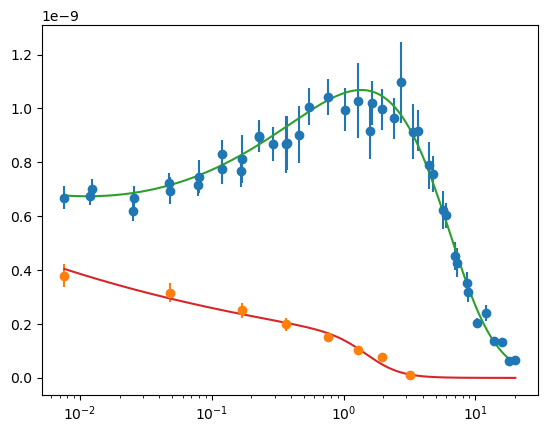

In [62]:
plt.errorbar(CH_data['energy'], CH_data['rate'], yerr = CH_data['uncertainty'], fmt="o")
plt.errorbar(CH2_data['energy'], CH2_data['rate'], yerr = CH2_data['uncertainty'], fmt="o")
plt.xscale("log")
energies = np.logspace(np.log10(min(CH_data['energy'])), np.log10(max(CH_data['energy'])), 1000)
CH_rates = [cross_sectionCH(energy, 2.3474E-16, 1.1028E-15, 1.4694E-01, 2.0471E-03) for energy in energies]
CH2_rates = [cross_sectionCH2(energy, 1.9983E-16, 5.4737E-02	, 5.6944E-03, 2.2891E-01) for energy in energies]
plt.plot(energies, CH_rates)
plt.plot(energies, CH2_rates)

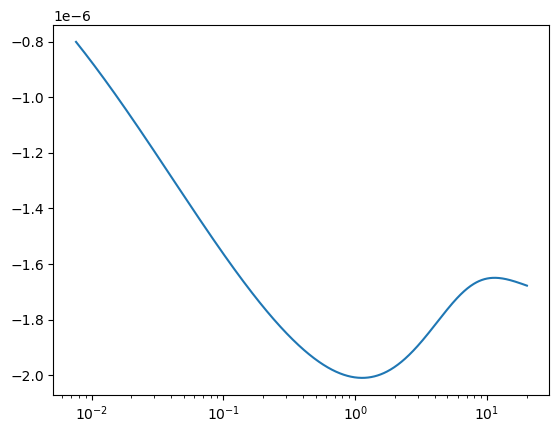

In [66]:
error_CH_rates = [((fitCH[char]-CH_rates[char])/CH_rates[char])*.0001 for char in range(len(fitCH))]
plt.plot(energies, error_CH_rates)
plt.xscale("log")

In [67]:
guessCH2 = [1.9983E-16, 5.4737E-02	, 5.6944E-03, 2.2891E-01]
poptCH2, pcovCH2 = optimize.curve_fit(cross_sectionCH, CH2_data['energy'], CH2_data['rate'], sigma = CH2_data['uncertainty'], p0 = guessCH2, method="lm")
perrCH2 = np.sqrt(np.diag(pcovCH2))
poptCH2

array([ 2.25755466e-16, -1.13712658e-16, -2.50073466e-01,  4.00087614e-02])

In [68]:
fitCH2 = [cross_sectionCH2(energy, 2.25755466e-16, -1.13712658e-16, -2.50073466e-01,  4.00087614e-02) for energy in energies]

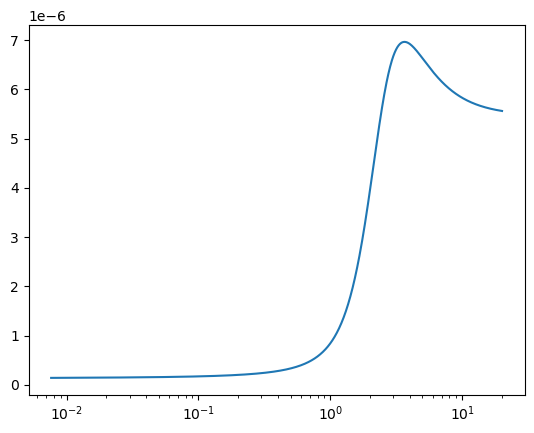

In [71]:
error_CH2_rates = [((fitCH2[char]-CH2_rates[char])/CH2_rates[char])*.000001 for char in range(len(fitCH2))]
plt.plot(energies, error_CH2_rates)
plt.xscale("log")